### <div style="text-align: right">Yuqian Wang, Jihan Gao</div>

![](http://media.npr.org/assets/img/2016/12/07/graduation-liftedbydata_slide-271e09a2737b0ad490a15c1be7fb62c67837ed63-s900-c85.jpg)
# Introduction
This tutorial is going to show some common ways to analyze a dataset and build good regression models as well as other appropriate machine learning techniques. We will also demonstrate ways to assess the performance of the models. Machine learning plays an important role in data science as it allows people to understand the structure of the data, make predictions and give recommendations. 

In this tutorial, we are using a dataset, which contains data about students’ personal information and school performances. Students are from a portuguese secondary school. The information was obtained by distributing questionaires in the school. The attributes we are going to pick are as follows.
* age - student's age (numeric: from 15 to 22)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* higher - wants to take higher education (binary: yes or no)
* absences - number of school absences (numeric: from 0 to 93)
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

The rest of the tutorial will lead you through our procedures of investigating relations between G3 and other possible variables and also of predicting whether a student will take higher education or not using our statistics.



# Step 1: Data Collection & Processing —— Loading data and Tidying
### Loading data
First, let's load our data! We are going to load dataset provided in CSV file, which stores attributes include students grade, demographic, social and school related features.
 We first download the student.zip file from the UCI Machines Learning Repository website: http://archive.ics.uci.edu/ml/machine-learning-databases/00320/. After upzipping, we are going to create a folder with four files inside, including a student-por.csv and a student-mat.csv. For this project, we will only use student-por.csv to analyze students performance on Portuguese language course.

In [1]:
import pandas as pd
data_raw = pd.read_csv('student-por.csv',delimiter = ';')[1:]  #Use delimiter to split each column
data_raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13


### Tyding data
To make our data tidier, we are going to choose some specific attributes which intuitively make more sense.
From the raw dataframe, some of the attributes have numeric values while some of the attributes have either binary or nominal values. To rearrange the data for future analyzing, we are going to transfer all binary attributes into 0/1 representation. The tiding process is shown below:

In [21]:
# Select attributes which are intuitively correlated
student_data = pd.DataFrame(data = data_raw[['age','famsize','Medu','Fedu','studytime','failures','paid','activities'
                                             ,'internet','romantic','Dalc','goout','higher','absences','G1','G2','G3']])

#Transfer yes/no into 0/1 representation
student_data['paid'] = [1 if p == 'yes' else 0 for p in student_data['paid']]
student_data['activities'] = [1 if p == 'yes' else 0 for p in student_data['activities']]
student_data['higher'] = [1 if p == 'yes' else 0 for p in student_data['higher']]
student_data['romantic'] = [1 if p == 'yes' else 0 for p in student_data['romantic']]
student_data['internet'] = [1 if p == 'yes' else 0 for p in student_data['internet']]
student_data['famsize'] = [1 if p == 'GT3' else 0 for p in student_data['famsize']]

student_data.head()

,age,famsize,Medu,Fedu,studytime,failures,paid,activities,internet,romantic,Dalc,goout,higher,absences,G1,G2,G3
1,17,1,1,1,2,0,0,0,1,0,1,3,1,2,9,11,11
2,15,0,1,1,2,0,0,0,1,0,2,2,1,6,12,13,12
3,15,1,4,2,3,0,0,1,1,1,1,2,1,0,14,14,14
4,16,1,3,3,2,0,0,0,0,0,1,2,1,0,11,13,13
5,16,0,4,3,2,0,0,1,1,0,1,2,1,6,12,12,13


# Step 2: Exploratory Analysis and Visualization
In order to roughly determine the correlation relationship between each variable, we build a scatter matrix. In a scatter matrix, each unit is a scatterplot with certain variables be the x value and y value respectively. From the scatterplot, we are able to tell whether the two variables are positively related or negatively related or not correlated at all. 

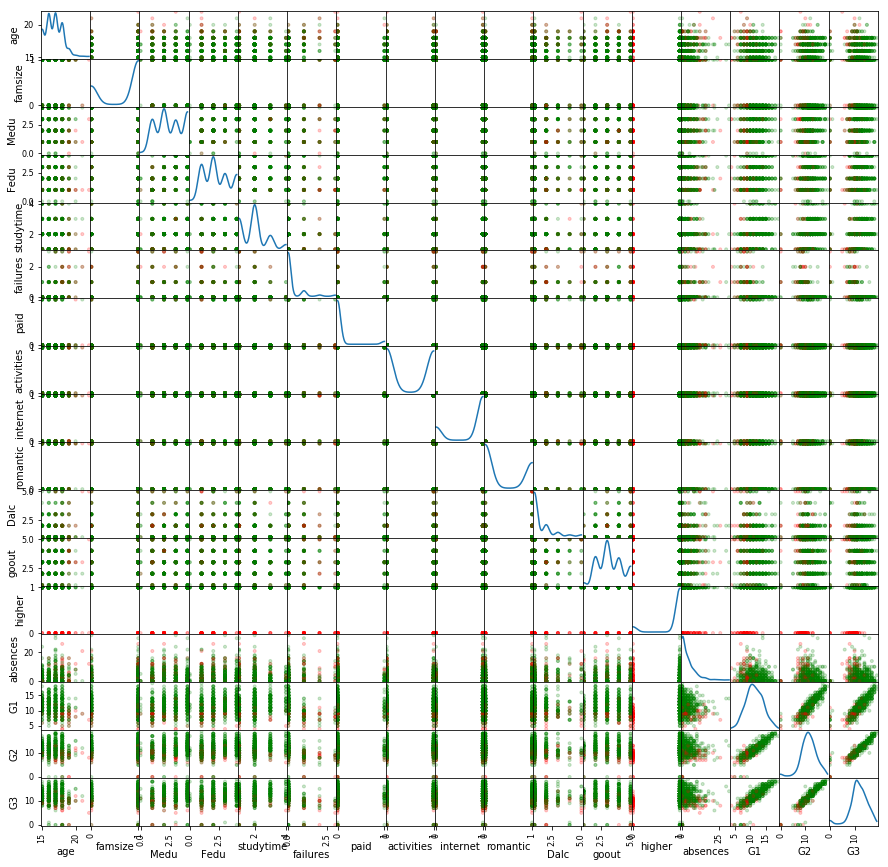

In [3]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# Plot the matrix and display scatter plot between every pair of attributes
colors=['red','green']
#In addition, use green point to represent students seek higher education and red for the rest.
scatter_matrix(student_data, alpha=0.2, figsize=(15, 15), diagonal='kde',c=student_data['higher'].apply(lambda x:colors[x]))
plt.show()
plt.clf()

#### Findings: 

Since most of our attributes are categorical, not every scatterplot makes sense. However, we find out that G3 is strongly related to G1 and G2. Students who receive higher G1 and G2 score, will more likely to achieve a high score in G3. This also makes sense in real life. In this tutorial, we will also build logistic models on whether students will seek higher education. Different colors that represent two categories of 'higher' are shown in this matrix. We found that on the grade plot, red points distributed twoard left while green points distributed toward the other side. This means students who achieve high grade(G1, G2, G3) tend to seek higher education.


# Step 3: Analysis hypothesis testing & ML
Based on the matrix generated on step 2, we will move forward conducting machine learning to predict final grade and whether students will seek higher eduction. Multivariate regression model will be used in Part 1. For Part 2, we are going to utilize logistic regression model and other machine learning algorithms.

### Split the data into training and test parts
The training set is used to build the model while the test set allows us to manually assess the model.

In [4]:
import sklearn
import numpy as np

data_list = np.split(student_data, 2)

data_train = data_list[0]  # Training set
data_test = data_list[1]  # Test set

## Part 1: Build Models on G3
We are going to build multivariate linear regression model and SVM model to explore which attributes affect G3. 

### Build a linear regression model with two features included(G3 ~ G1 + G2)

One most common way to select features into our model is by observing the scatter matrix. Based on our findings above, that G3 is strongly correlated with G1 and G2, we first build a simple model by making G1 and G2 our independent variables. Codes used to build this model is as follows. 

In [5]:
from sklearn import linear_model

clf_1 = linear_model.LinearRegression()   
clf_1.fit(data_train[['G1','G2']], data_train[['G3']])
G3_predict = clf_1.predict(data_test[['G1','G2']])

### Feature selection
However, we would like to optimize the dataset. Apart from G1 and G2, other attributes may also affect G3. For example, more absences will lead to lower G3 grade. Therefore, we are showing two approaches of performing feature selection here. The second model is usually expected to perform better than the first one because more features are selected. You can pick whichever features you considered to be appropriate. But bear in mind, do not overfit! Ways to avoid overfitting include setting a limit on the number of features beforehand.

#### Method 1: Plot correlation heat map to rank features
Features that have higher correlation with G3 can be considered to be used as independent variables.

Correlation between each feature and G3:
 age          -0.106152
famsize      -0.044753
Medu          0.241052
Fedu          0.212870
studytime     0.249841
failures     -0.393544
paid         -0.055013
activities    0.059418
internet      0.149629
romantic     -0.090960
Dalc         -0.205014
goout        -0.087378
higher        0.332372
absences     -0.091353
G1            0.835850
G2            0.918546
G3            1.000000
Name: G3, dtype: float64


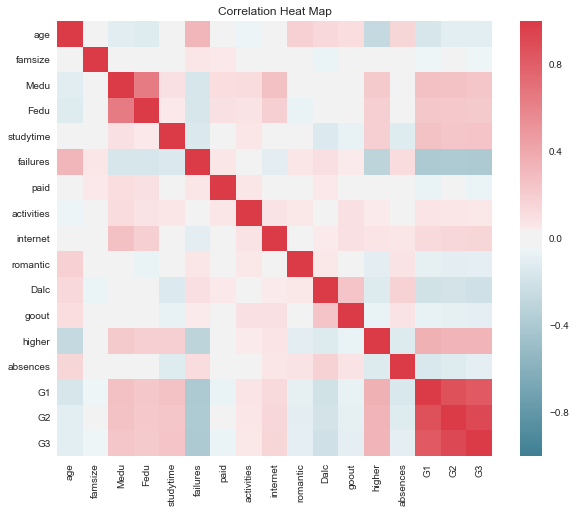

In [6]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
plt.title('Correlation Heat Map')
corr = student_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
print("Correlation between each feature and G3:\n",corr['G3'])
plt.show()
plt.clf()

Conclusion: 

From the correlation between each feature and G3, features of Medu, Fedu, studytime, higher, G1 and G2 have a relatively higher correlation with G3 than other features. However, compare to the other two methods, this one is less accurate because it only measures the correlation.

#### Method 2: Compare p values of each feature:
features that have lower p values will be selected

In [7]:
from pandas.stats.api import ols
import statsmodels.formula.api as sm
from sklearn import feature_selection

ols = sm.ols(formula = "G3 ~age + famsize + Medu +Fedu + studytime + failures + paid + activities +\
                         internet + romantic + Dalc + goout + higher + absences + G1 + G2", data = data_train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     86.62
Date:                Fri, 19 May 2017   Prob (F-statistic):          1.80e-103
Time:                        01:55:05   Log-Likelihood:                -480.28
No. Observations:                 324   AIC:                             994.6
Df Residuals:                     307   BIC:                             1059.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9474      1.174     -0.807      0.4

Conclusion:


In the ols summary table, we are able to see the p value for each attribute. The null hypothesis of the p-value test is that the coefficient is equal to zero. A low p-value indicates the rejection of the null hypothesis. A predictor that has a low p-value is likely to be a meaningful addition to your model. By comparing the p value, we select following attributes: age, Fedu, failures, activities, goout, higher, G1 and G2.

#### Method 3: F regression: Features with lower p scores will be selected.

In [8]:
#the function conducts f-regression, returns an array of f values of features and an array of p-value of f scores.
f_score = feature_selection.f_regression(data_train[['age','famsize','Medu','Fedu','studytime','failures','paid',
                            'activities','internet','romantic','Dalc','goout','higher','absences','G1','G2']],data_train['G3'])
print("f score, p values:\n",f_score)

f score, p values:
 (array([  1.04412596e+01,   3.04643018e-01,   1.75302881e+01,
         8.15157439e+00,   1.47635537e+01,   7.09632833e+01,
         1.38186711e+00,   1.45676594e+01,   3.51643667e-01,
         5.98111286e-01,   1.74058134e+01,   8.00985741e+00,
         6.45214558e+01,   1.41585710e+01,   6.31899069e+02,
         1.29951183e+03]), array([  1.35971781e-003,   5.81369060e-001,   3.65356997e-005,
         4.58152240e-003,   1.46801779e-004,   1.22342589e-015,
         2.40651813e-001,   1.62139316e-004,   5.53600408e-001,
         4.39866936e-001,   3.88761747e-005,   4.94456050e-003,
         1.81887664e-014,   1.99615231e-004,   6.32887918e-078,
         4.60329647e-115]))


Conclusion: 

In the F test, the null hypothesis claims that there is no significant correlation at all. That is, all of the coefficients are zero. A lower p value means a strong correlation. That feature should be considered. The f regression result shows that features of failures, higher, G1 and G2 have a relatively higher p value than other features. 

### Build a multivatiate regression with more features included (G3 ~ age +... + G2)
After comparison from feature selection, We decide to choose age, activities, failures, higher, G1 and G2.

In [9]:
from sklearn import linear_model
clf_2 = linear_model.LinearRegression()

clf_2.fit(data_train[['age','activities','Fedu','goout','failures','higher','G1','G2']], data_train[['G3']])
G3_predict = clf_2.predict(data_test[['age','activities','Fedu','goout','failures','higher','G1','G2']])


### Build SVM model
Kernel rbf and lin are used

In [10]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_rbf.fit(data_train[['age','activities','Fedu','goout','failures','higher','G1','G2']], data_train['G3'])
svr_lin.fit(data_train[['age','activities','Fedu','goout','failures','higher','G1','G2']], data_train['G3'])

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Ways to assess the model (Wilcoxon rank test, mean square error, r square value, residule plot, predicted value vs. actual value)
Now, we have the model! Let's assess it using our test set. We take multivariate linear regression model as example.

Wilcoxon rank score:
 WilcoxonResult(statistic=24656.0, pvalue=0.3226306515211399) 

Mean square error:
 2.12149492799 

r-square:
 0.853679527083 



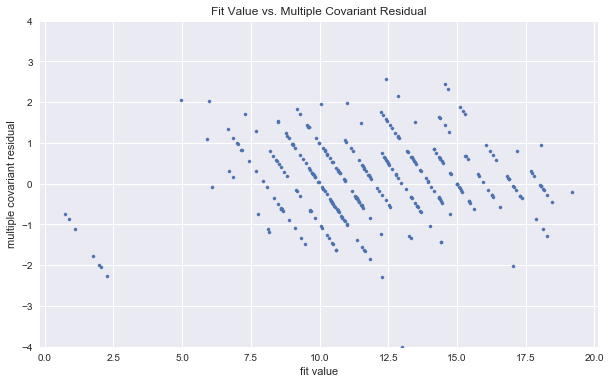

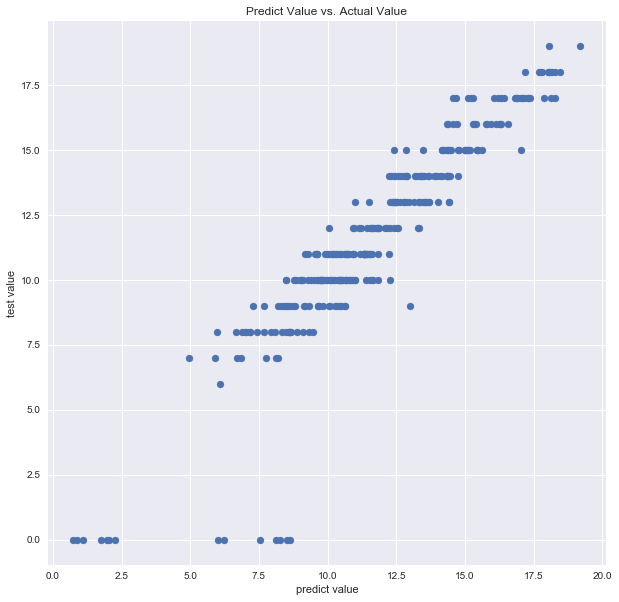

In [20]:
from scipy import stats
from sklearn.metrics import mean_squared_error

# Wilcoxon rank score
print('Wilcoxon rank score:\n',stats.wilcoxon(data_test[['G3']].values.flatten(), G3_predict.flatten()),'\n')

# mean square error 
mse = mean_squared_error(data_test[['G3']], G3_predict)
print('Mean square error:\n',mse,'\n')

#r-square
from sklearn.metrics import r2_score
print('r-square:\n',r2_score(data_test[['G3']],G3_predict),'\n')

# residual plot
multi_residual = data_test[['G3']] - G3_predict
plt.subplots(figsize = (10,6))
plt.scatter(x = G3_predict, y = multi_residual,s=10)
plt.ylim([-4,4])
plt.xlabel('fit value')
plt.ylabel('multiple covariant residual')
plt.title('Fit Value vs. Multiple Covariant Residual')
plt.show()
plt.clf()

# predict vs. actual plot
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
plt.scatter(G3_predict,data_test[['G3']])
plt.xlabel('predict value')
plt.ylabel('test value')
plt.title('Predict Value vs. Actual Value')
plt.show()
plt.clf()

Conclusion: 
* The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test. The p value we obtained from the test is 0.322, which is very high. It shows the predicted value and actual value are roughly same.

* Mean square error measures the average of the squares of the errors or deviations. The mean square error from the model is 2.12.

* R-squared is the percentage of the response variable variation that is explained by a linear model. The r-square from the model is 0.8536, which shows 85 percent of the values account for the model.

* In a residual v.s fitted_value plot, the distance from the line at 0 reflects how bad the prediction is for a specific value. A healthy plot of a linear regresson model should be symmetric and cluster towards the middle line. The plot we get is pretty symmetric. There are several outliers that could be observed from the point.

* The points on the last graph fall in a line which forms a roughly 45 degree angle with x axis. That indicates the estimated G3 score is approximately the same as the actual value.

### Compare the different sets of features with multivariate linear model 
We are using f test and cross validation here


In [12]:
# cross validation  
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf_1, student_data[['G1','G2']], student_data[['G3']], cv=5)
scores2 = cross_val_score(clf_2, student_data[['age','Fedu','failures','activities','goout','higher','G1','G2']], 
                          student_data[['G3']], cv=5)
print('Cross validation score for the first model:\n',np.mean(scores1),'\n')
print('Cross validation score for the second model:\n',np.mean(scores2),'\n')

Cross validation score for the first model:
 0.82583425527 

Cross validation score for the second model:
 0.821701421402 



In [13]:
# f test
ols_1 =sm.ols(formula = "G3 ~  G1 + G2", data = student_data).fit()
ols_2 = sm.ols(formula = "G3 ~age + Fedu + failures + activities + goout + higher + G1 + G2", data = student_data).fit()
print(ols_1.summary())
print(ols_2.summary())


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1800.
Date:                Fri, 19 May 2017   Prob (F-statistic):          1.33e-264
Time:                        01:55:12   Log-Likelihood:                -1068.9
No. Observations:                 648   AIC:                             2144.
Df Residuals:                     645   BIC:                             2157.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.2006      0.217     -0.925      0.3

Conclusion:
* The cross validation scores are similar. They all have high accuracy.

* A better model should have a lower F-test value. Based on the two table that we generated above, we see that the second model has a relative small F-test value(452.2), which is significantly higher than the first model(1800). 



### Compare Different Models (Multivariate Linear Regression Model vs. SVMs)

In [14]:
# cross validation  
from sklearn.model_selection import cross_val_score

train_data = np.asarray(student_data[['age','Fedu','failures','activities','goout','higher','G1','G2']])
train_label = np.asarray(student_data['G3'])
scores1 = cross_val_score(clf_2, train_data, train_label, cv=5)
scores2 = cross_val_score(svr_rbf, train_data, train_label, cv=5)
scores3 = cross_val_score(svr_lin, train_data, train_label, cv=5)
print('Cross validation score for the multivariate linear regression model:\n',np.mean(scores1),'\n')
print('Cross validation score for the SVM rdf model:\n',np.mean(scores2),'\n')
print('Cross validation score for the SVM lin model:\n',np.mean(scores3))

Cross validation score for the multivariate linear regression model:
 0.821701421402 

Cross validation score for the SVM rdf model:
 0.341704844449 

Cross validation score for the SVM lin model:
 0.82600706219


Conclusion：

After comparing the cross validation mean score, we find out that multivariate linear regression model and the SVM lin model performs well while SVM rdf doing the worst. 

## Part 2: Build Logistic Regression 
Next we are going to investigate the factors that affect whether a student will receive higher education or not. This information is shown in the “higher” column. The result is binary so we use logistic regression. 

### Feature selection
We do feature selection at the very first. Randomized Logistic Regression in the sklearn package is used in this step. The method assigns high scores to features that are repeatedly selected across randomizations. Features selected more often are considered good features.


In [15]:
from sklearn.linear_model import RandomizedLogisticRegression

# build logistic regression model with all attributes and do feature selection
randomized_log = RandomizedLogisticRegression()
randomized_log.fit(data_train[['age','famsize','Medu','Fedu','studytime','failures','paid','activities',
                               'internet','romantic','Dalc','goout','absences','G1','G2','G3']],data_train['higher'])
 # the function returns an array of boolean values. True means accepted features.
randomized_log.get_support(indices=False)    

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True], dtype=bool)

### Build logistic model
From above feature selection, we build a new logistic regression model with age，failures，G2, G3. 

In [16]:
#Logistic regression model
reg_log = linear_model.LogisticRegression()
reg_log.fit(data_train[['age', 'G2', 'G3', 'failures']], data_train['higher'])
higher_predict = reg_log.predict(data_test[['age', 'G2', 'G3', 'failures']])

### Assess logistic model 
We use wilcoxon rank test, mean square error and r-square to evaluate the model.

In [17]:
# Wilcoxon rank test
print('Wilcoxon rank test:\n',stats.wilcoxon(data_test['higher'].values.flatten(), higher_predict.flatten()),'\n')

# mean square error 
mse_log = mean_squared_error(data_test[['higher']], higher_predict)
print('mean square error\n',mse,'\n')

#r-square
print('r square:\n',reg_log.score(data_test[['age', 'G2', 'G3', 'failures']],data_test['higher']))

Wilcoxon rank test:
 WilcoxonResult(statistic=675.0, pvalue=0.68027954733445029) 

mean square error
 2.12149492799 

r square:
 0.836419753086


Conclusion: 
* The p value we obtained from the test is 0.680, which is very high. It shows the predicted value and actual value are roughly same.

* Mean square error measures the average of the squares of the errors or deviations. The mean square error from the model is 2.1215.

* R-squared is the percentage of the response variable variation that is explained by a linear model. The r-square from the model is 0.8364, which shows around 83 percent of the values account for the model.

### Other machine learning algorithms
Classification is the problem of identifying to which category an observation belongs, on the basis of a training set of data. We pick Linear SVC, K-Nearest Neighbor and Random forest to train our data.

In [18]:
# Linear SVC
from sklearn.svm import LinearSVC
result_SVC = []
clf_SVC = LinearSVC()
clf_SVC.fit(data_train[['age', 'G2', 'G3', 'failures']],data_train['higher'])
higher_SVC = clf_SVC.predict(data_test[['age', 'G2', 'G3', 'failures']])
print ('Linear SVC score:\n', stats.wilcoxon(data_test[['higher']].values.flatten(), higher_SVC.flatten()),'\n')

# K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(data_train[['age', 'G2', 'G3', 'failures']],data_train['higher'])
higher_KNN = clf_KNN.predict(data_test[['age', 'G2', 'G3', 'failures']])
print('k nearest neighbour score:\n', stats.wilcoxon(data_test[['higher']].values.flatten(), higher_KNN.flatten()),'\n')    

# Random forest
from sklearn.ensemble import RandomForestClassifier
result_RF = []
clf_RF = RandomForestClassifier()
clf_RF.fit(data_train[['age', 'G2', 'G3', 'failures']],data_train['higher'])
higher_RF = clf_RF.predict(data_test[['age', 'G2', 'G3', 'failures']])
print('Random Forest score:\n', stats.wilcoxon(data_test[['higher']].values.flatten(), higher_RF.flatten()))

Linear SVC score:
 WilcoxonResult(statistic=650.0, pvalue=0.88863786089500785) 

k nearest neighbour score:
 WilcoxonResult(statistic=854.0, pvalue=0.60557661633534621) 

Random Forest score:
 WilcoxonResult(statistic=768.0, pvalue=0.058781721355358862)


Conclusion:

We did wilcoxon test and find out that Random Forest is not fit for the statistics because the value is too small. The other two performs well.

In [19]:
# cross validation  
from sklearn.model_selection import cross_val_score

score_log =cross_val_score(reg_log, student_data.iloc[1:648, [0,5,15,16]].values, student_data.iloc[1:648, 12].values, cv=5)
scores1 = cross_val_score(clf_SVC, student_data.iloc[1:648, [0,5,15,16]].values, student_data.iloc[1:648, 12].values, cv=5)
scores2 = cross_val_score(clf_KNN, student_data.iloc[1:648, [0,5,15,16]].values, student_data.iloc[1:648, 12].values, cv=5)
scores3 = cross_val_score(clf_RF, student_data.iloc[1:648, [0,5,15,16]].values, student_data.iloc[1:648, 12].values, cv=5)
print('Cross validation mean score:')
print('Logistic regression:',np.mean(scores1))
print('Linear SVC:',np.mean(scores1))
print('K Nearest Neighbour:',np.mean(scores2))
print('Random Forest:',np.mean(scores3))

Cross validation mean score:
Logistic regression: 0.879328413834
Linear SVC: 0.879328413834
K Nearest Neighbour: 0.87620322749
Random Forest: 0.834329159213


Conclusion: 

Cross validation is also used to assess each model. From above result, the cross validation score of Random forest is farily good. But still, it performs worse than the Linear SVC and K Nearest Neighbour.

### In this tutorial, we studies the factors that affect G3 and whether a student is going to seek higher education. We use multivariate linear regression model and SVMs model to analyze G3. Logistic linear regression model, Linear SVC, Random Forest and K-Nearest Neighbor are utilized to study attribute "higher". Addtionally, we introduce ways to do feature selection and assess models. 


## Summary and references

* Student performance dataset: http://archive.ics.uci.edu/ml/datasets/student+performance
* Wilcoxon signed-rank test: https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test
* Classification: https://en.wikipedia.org/wiki/Classification
* Cross-validation: https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* Scikit-learn, machine learning in python: http://scikit-learn.org/stable/